In [1]:
%matplotlib inline

import math as m
import numpy as np

import matplotlib
import matplotlib.pyplot as plt


yellow='#ffb200'
red='#DD5544'
blue='#0284C0'

In [2]:
matplotlib.rc('font', family='serif') 
matplotlib.rc('font', serif='Palatino Linotype') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 20})

In [3]:
def sphere(R, h, coordinates):
    S = np.array([R / 2, R/ 2, h + R / 2])
    return np.linalg.norm(coordinates - S) <= R/2

In [21]:
R = 40e-3
h = 20e-3
a = 20
b = 10
dx = 5
nxy = 8
nz = 8

In [22]:
geometry = np.empty((nxy + 3, nxy + 3, nz), dtype=bool)
for (i, j, k), value in np.ndenumerate(geometry):
    coor = np.array([(i - 1) / nxy*R, (j - 1) / nxy*R, k / nz*R + h]) 
    geometry[i, j, k] = sphere(R, h, 
                               coor)

In [23]:
print('number_of_layers = {};\n'.format(nz + 2))
print('a = {};'.format(a))
print('b = {};'.format(b))
print('dx = {};'.format(dx))

print('h = {};'.format(h))
print('r = {};'.format(R))
print('nxy = {};'.format(nxy))
print('w = 1.33;')

print('\n')


print('l = 1;')
print('thickness(l) = 0.05;')
print('coordinate_x_1 = [0, a];')
print('coordinate_y_1 = [0, b];')

print('r_index_1 = [gold];')
print('\n\n')

print('l = 2;')
print('thickness(l) = h;')
print('coordinate_x_2 = [0, a];')
print('coordinate_y_2 = [0, b];')

print('r_index_2 = [w];')
print('\n\n')

for i in range(nz):
#     coordinate_sphere = [a/n*j for j in range(nz + 1)]
#     coordinate_sphere = [(a-R)/2 + R/nxy*j for j in range(nxy + 2)]
#     coordinate_x = [0] + coordinate_sphere + [a]

    coordinate_sphere_x = ['(a-r)/2 + r/nxy*{} + dx'.format(j) for j in range(nxy + 2)]
    coordinate_sphere_y = ['(b-r)/2 + r/nxy*{}'.format(j) for j in range(nxy + 2)]
    
    coordinate_x = [0] + coordinate_sphere_x + ['a']
    coordinate_x = str(coordinate_x).replace("'", "")

    coordinate_y = [0] + coordinate_sphere_y + ['b']
    coordinate_y = str(coordinate_y).replace("'", "")
    
    r_index = str(geometry[:, :, i])  
    
    r_index = r_index.replace('\n  ', ' ')  
    
    
    r_index = r_index.replace(' ', ', ')  
    r_index = r_index.replace(']\n, [', ';\n')
    r_index = r_index.replace('False', 'w')
    r_index = r_index.replace('True', 'gold')
    r_index = r_index.replace('[[', '[')
    r_index = r_index.replace(']]', ']')
    r_index = r_index.replace(' , ', ' ')
    

    print('l = {};'.format(i + 3))
    print('thickness(l) = {:.2f};'.format(R/nz))
    print('coordinate_x_{} = {};'.format(i + 3, coordinate_x))
    print('coordinate_y_{} = {};'.format(i + 3, coordinate_y))
    print('r_index_{} = {};'.format(i + 3, r_index))
    
    
    print('\n\n')
    
#     break
    

number_of_layers = 10;

a = 20;
b = 10;
dx = 5;
h = 0.02;
r = 0.04;
nxy = 8;
w = 1.33;


l = 1;
thickness(l) = 0.05;
coordinate_x_1 = [0, a];
coordinate_y_1 = [0, b];
r_index_1 = [gold];



l = 2;
thickness(l) = h;
coordinate_x_2 = [0, a];
coordinate_y_2 = [0, b];
r_index_2 = [w];



l = 3;
thickness(l) = 0.01;
coordinate_x_3 = [0, (a-r)/2 + r/nxy*0 + dx, (a-r)/2 + r/nxy*1 + dx, (a-r)/2 + r/nxy*2 + dx, (a-r)/2 + r/nxy*3 + dx, (a-r)/2 + r/nxy*4 + dx, (a-r)/2 + r/nxy*5 + dx, (a-r)/2 + r/nxy*6 + dx, (a-r)/2 + r/nxy*7 + dx, (a-r)/2 + r/nxy*8 + dx, (a-r)/2 + r/nxy*9 + dx, a];
coordinate_y_3 = [0, (b-r)/2 + r/nxy*0, (b-r)/2 + r/nxy*1, (b-r)/2 + r/nxy*2, (b-r)/2 + r/nxy*3, (b-r)/2 + r/nxy*4, (b-r)/2 + r/nxy*5, (b-r)/2 + r/nxy*6, (b-r)/2 + r/nxy*7, (b-r)/2 + r/nxy*8, (b-r)/2 + r/nxy*9, b];
r_index_3 = [w, w, w, w, w, w, w, w, w, w, w;
w, w, w, w, w, w, w, w, w, w, w;
w, w, w, w, w, w, w, w, w, w, w;
w, w, w, w, w, w, w, w, w, w, w;
w, w, w, w, w, w, w, w, w, w, w;
w, w, w, w, w, gold, w, w, w,

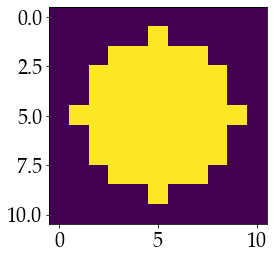

In [27]:
plt.imshow(geometry[:, :, nz//2])
# plt.imshow(geometry[:, 10, :])
# plt.imshow(geometry[10, :, :])